# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [68]:
#Import all the necessary modules
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [41]:
pima_df = pd.read_csv("diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [42]:
pima_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134,74,33,60,25.9,0.460,81,0
658,11,127,106,0,0,39.0,0.190,51,0
585,1,93,56,11,0,22.5,0.417,22,0
154,8,188,78,0,0,47.9,0.137,43,1
672,10,68,106,23,49,35.5,0.285,47,0
502,6,0,68,41,0,39.0,0.727,41,1
742,1,109,58,18,116,28.5,0.219,22,0
692,2,121,70,32,95,39.1,0.886,23,0
520,2,68,70,32,66,25.0,0.187,25,0
453,2,119,0,0,0,19.6,0.832,72,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [43]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [45]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
pima_df[cols] = pima_df[cols].replace({ 0:np.nan})

pima_df.sample(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
726,1,116.0,78.0,29.0,180.0,36.1,0.496,25.0,0
428,0,135.0,94.0,46.0,145.0,40.6,0.284,26.0,0
652,5,123.0,74.0,40.0,77.0,34.1,0.269,28.0,0
192,7,159.0,66.0,NaN,NaN,30.4,0.383,36.0,1
82,7,83.0,78.0,26.0,71.0,29.3,0.767,36.0,0
594,6,123.0,72.0,45.0,230.0,33.6,0.733,34.0,0
42,7,106.0,92.0,18.0,NaN,22.7,0.235,48.0,0
381,0,105.0,68.0,22.0,NaN,20.0,0.236,22.0,0
402,5,136.0,84.0,41.0,88.0,35.0,0.286,35.0,1
612,7,168.0,88.0,42.0,321.0,38.2,0.787,40.0,1


In [46]:
#pima_df[cols] = pima_df[cols].fillna((pima_df[cols].median()),inplace=True)
pima_df.fillna(pima_df.median(), inplace= True)
pima_df.sample(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
520,2,68.0,70.0,32.0,66.0,25.0,0.187,25.0,0
701,6,125.0,78.0,31.0,125.0,27.6,0.565,49.0,1
239,0,104.0,76.0,29.0,125.0,18.4,0.582,27.0,0
655,2,155.0,52.0,27.0,540.0,38.7,0.240,25.0,1
601,6,96.0,72.0,29.0,125.0,23.7,0.190,28.0,0
299,8,112.0,72.0,29.0,125.0,23.6,0.840,58.0,0
282,7,133.0,88.0,15.0,155.0,32.4,0.262,37.0,0
345,8,126.0,88.0,36.0,108.0,38.5,0.349,49.0,0
48,7,103.0,66.0,32.0,125.0,39.1,0.344,31.0,1
182,1,117.0,74.0,20.0,23.0,27.7,0.299,21.0,0


# Q5 Print the descriptive statistics of each & every column using describe() function

In [47]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [52]:
pima_df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

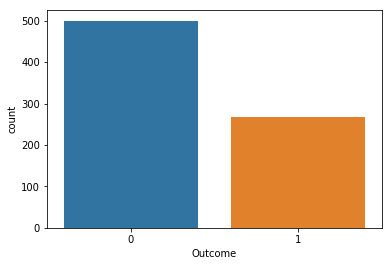

In [53]:
sns.countplot(x='Outcome', data=pima_df);

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [92]:
pima_df.groupby(["Outcome"]).count()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

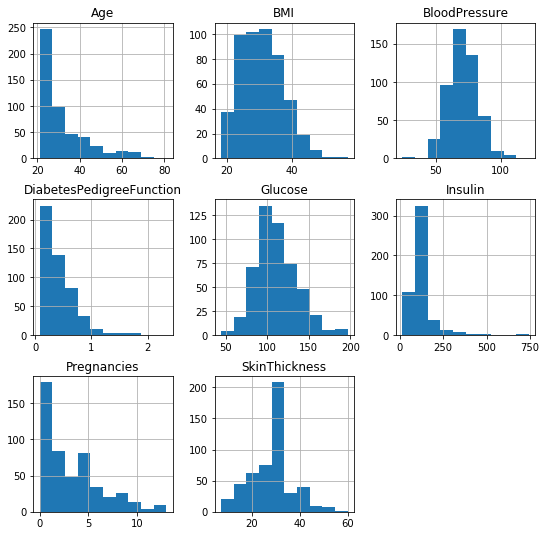

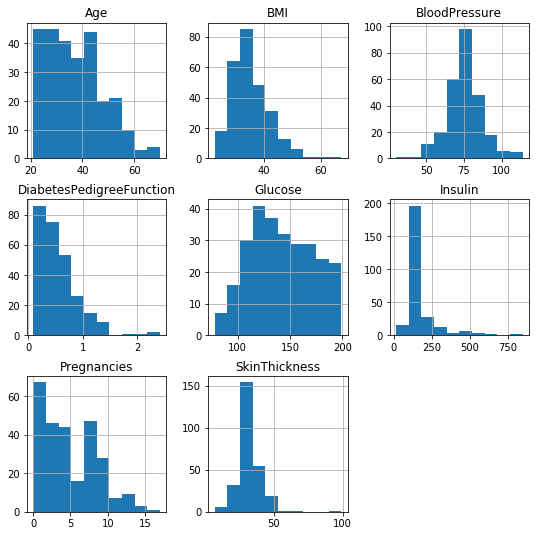

In [91]:
pima_df.groupby('Outcome').hist(figsize=(9, 9))

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\Users\Bikram\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Bikram\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


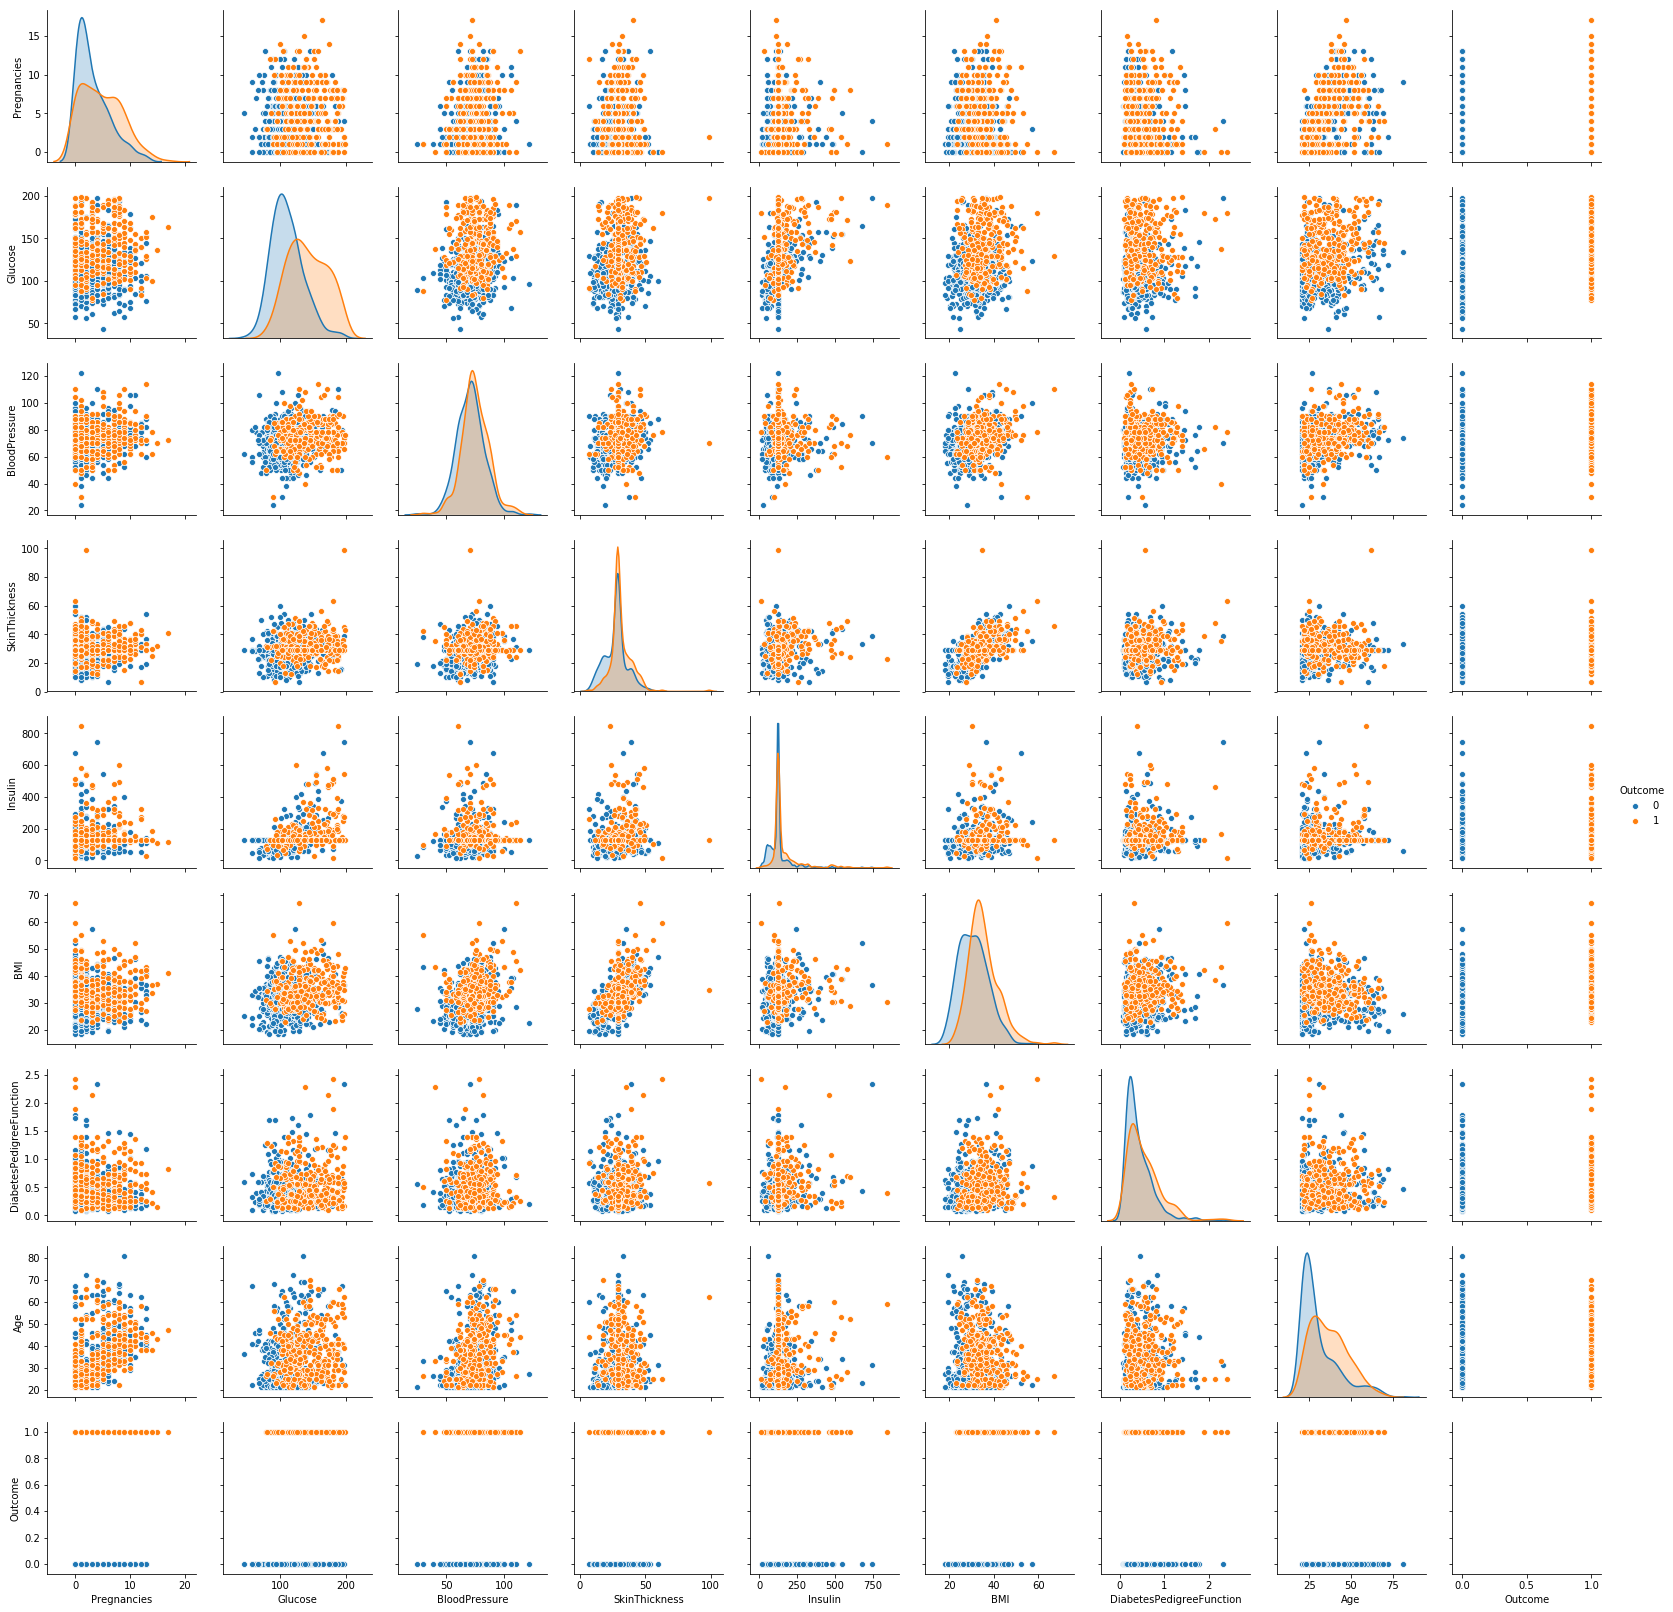

In [99]:
sns.pairplot(pima_df, hue='Outcome')

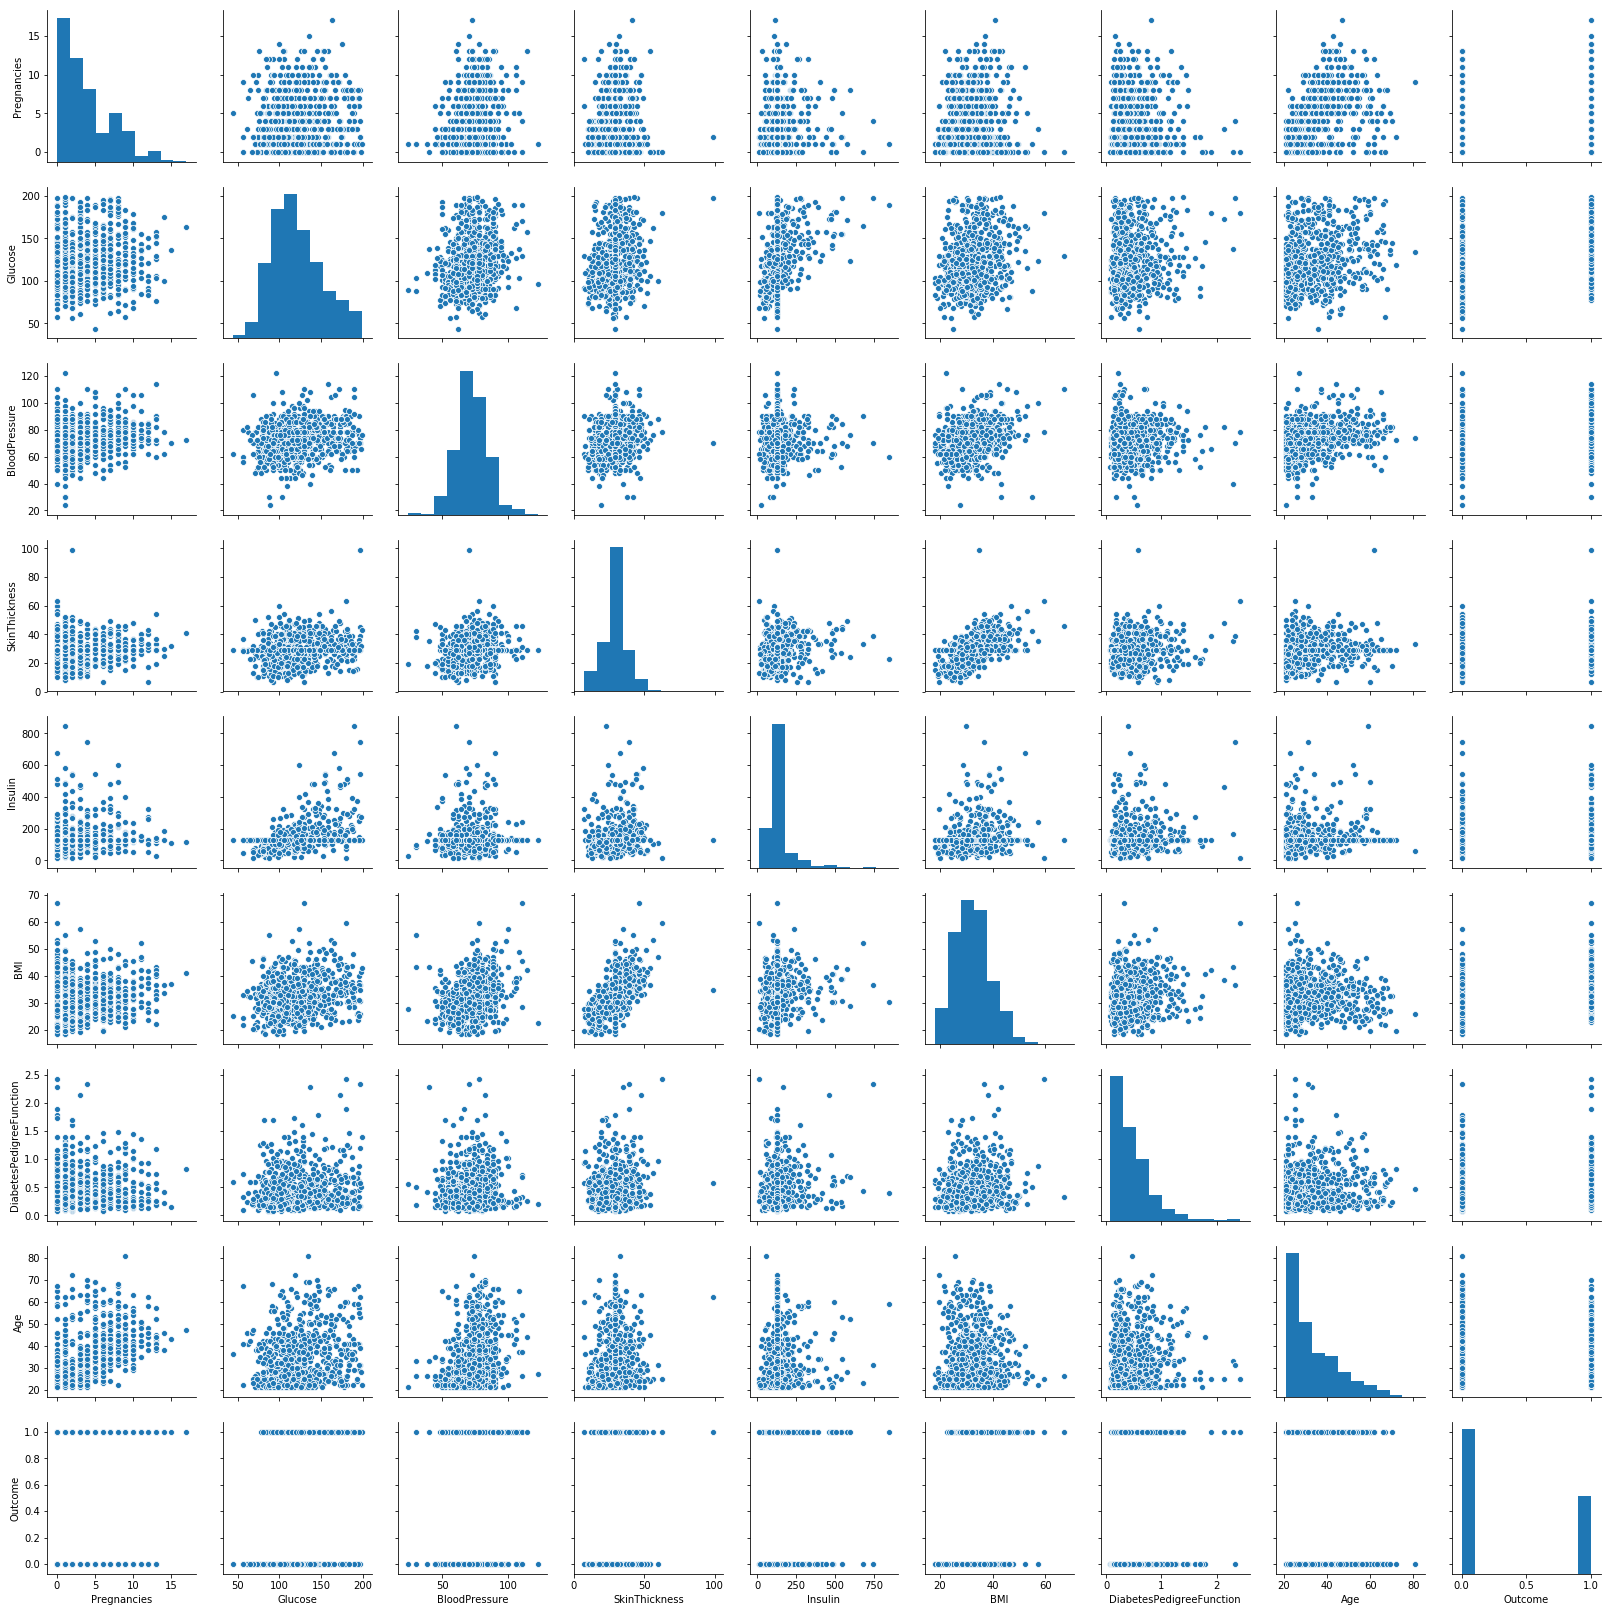

In [100]:
sns.pairplot(pima_df)

In [95]:
pima_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [ ]:
'''
Inferences from pairplot and correlation matrix:

Attributes which look normally distributed (Glucose, BloodPressure, SkinThickness, and BMI).
Some of the attributes look like they may have an exponential distribution (Pregnancies, Insulin, DiabetesPedigreeFunction, Age).
Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

From scatter plots, to me only BMI & SkinThickness and Pregnancies & Age seem to have positive linear relationships. Another likely suspect is Glucose and Insulin.

There is no obvious relationship between age and onset of diabetes.
There is no obvious relationship between pedi function and onset of diabetes.
'''


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [96]:
X = pima_df.iloc[:,0:8]
Y = pima_df.iloc[:,8]
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [97]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [98]:
# Model Accuracy, how often is the classifier correct?
expected = y_test
predicted = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(pd.DataFrame(metrics.confusion_matrix(expected, predicted, labels=[1,0]), index=['true:1', 'true:0'], columns=['pred:1', 'pred:0']))


Accuracy: 0.7792207792207793
        pred:1  pred:0
true:1      63      22
true:0      29     117


Print the feature importance of the decision model - Optional

In [87]:
clf.feature_importances_



array([0.07591243, 0.22936226, 0.12256579, 0.05802785, 0.0765937 ,
       0.21741443, 0.11888412, 0.10123942])

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

C:\Users\Bikram\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
# predictions
rfc_predict = rf_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))

Accuracy: 0.7878787878787878


In [82]:
print(pd.DataFrame(metrics.confusion_matrix(y_test, rfc_predict, labels=[1,0]), index=['true:1', 'true:0'], columns=['pred:1', 'pred:0']))

        pred:1  pred:0
true:1      53      32
true:0      17     129


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.